# Importing Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:

steeldf = pd.read_csv("AnalysisSteel")
steeldf.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
plt.style.use('dark_background')

In [5]:
steeldf.sample(3)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Hour,Day,Month
2556,2018-01-27 15:15:00,32.15,1.84,4.28,0.01,99.84,99.13,54900,Weekend,Saturday,Medium_Load,15,27,1
25779,2018-09-26 13:00:00,2.81,0.00,10.98,0.00,100.00,24.79,46800,Weekday,Wednesday,Light_Load,13,26,9
27059,2018-10-09 21:00:00,3.74,0.00,18.11,0.00,100.00,20.22,75600,Weekday,Tuesday,Medium_Load,21,9,10


## General Vision
Our goal with the heatmap is to gain an overview of the correlations between the variables in our dataset. The heatmap allows us to intuitively visualize the strength and direction of relationships between variables, using a color scale to highlight patterns and associations that might not be obvious by just looking at the raw data. This makes it easier to identify variables that have a greater impact on one another, helping to guide the next steps of the analysis.

<Axes: >

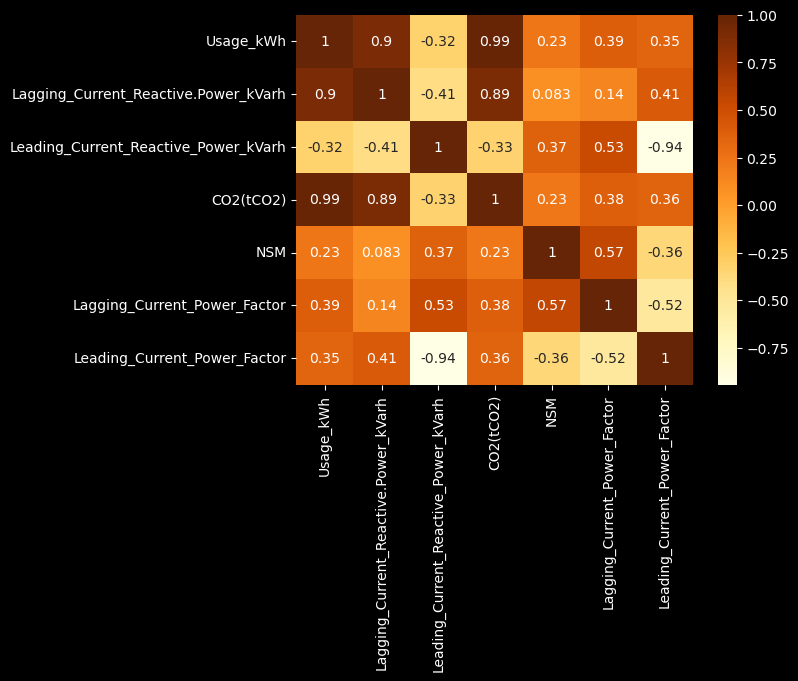

In [7]:
f, ax = plt.subplots()
sns.heatmap(steeldf[["Usage_kWh","Lagging_Current_Reactive.Power_kVarh","Leading_Current_Reactive_Power_kVarh","CO2(tCO2)","NSM","Lagging_Current_Power_Factor","Leading_Current_Power_Factor"]].corr(),annot=True,cmap="YlOrBr")


## Exploring Energy Consumption Patterns for Optimization

Each chart here doesn’t just present data but tells a story about how our energy is used throughout the week and day.

- The first bar chart helps us answer an important question: is there a significant difference in energy consumption between weekdays and weekends? This can help us identify potential operational adjustments to reduce consumption during periods of low activity.

- In the second bar chart, we explore how energy usage varies across the days of the week. Through this visualization, we can see which days demand more electricity, potentially revealing unexpected peaks and opportunities to redistribute or optimize consumption.

- The line chart adds a new dimension to the analysis, showing us how energy is consumed over the course of the day. Here, we can identify hourly patterns that may guide strategic decisions, such as reducing production during lower usage times or redistributing the load to more efficient periods.

- Finally, the pie chart offers an intuitive way to visualize each day of the week’s contribution to the total energy consumption. It quickly highlights the impact of each day, helping us identify which are the most relevant for focusing future optimization initiatives.








Text(0.6, 30, 'without the use of steel machinery.')

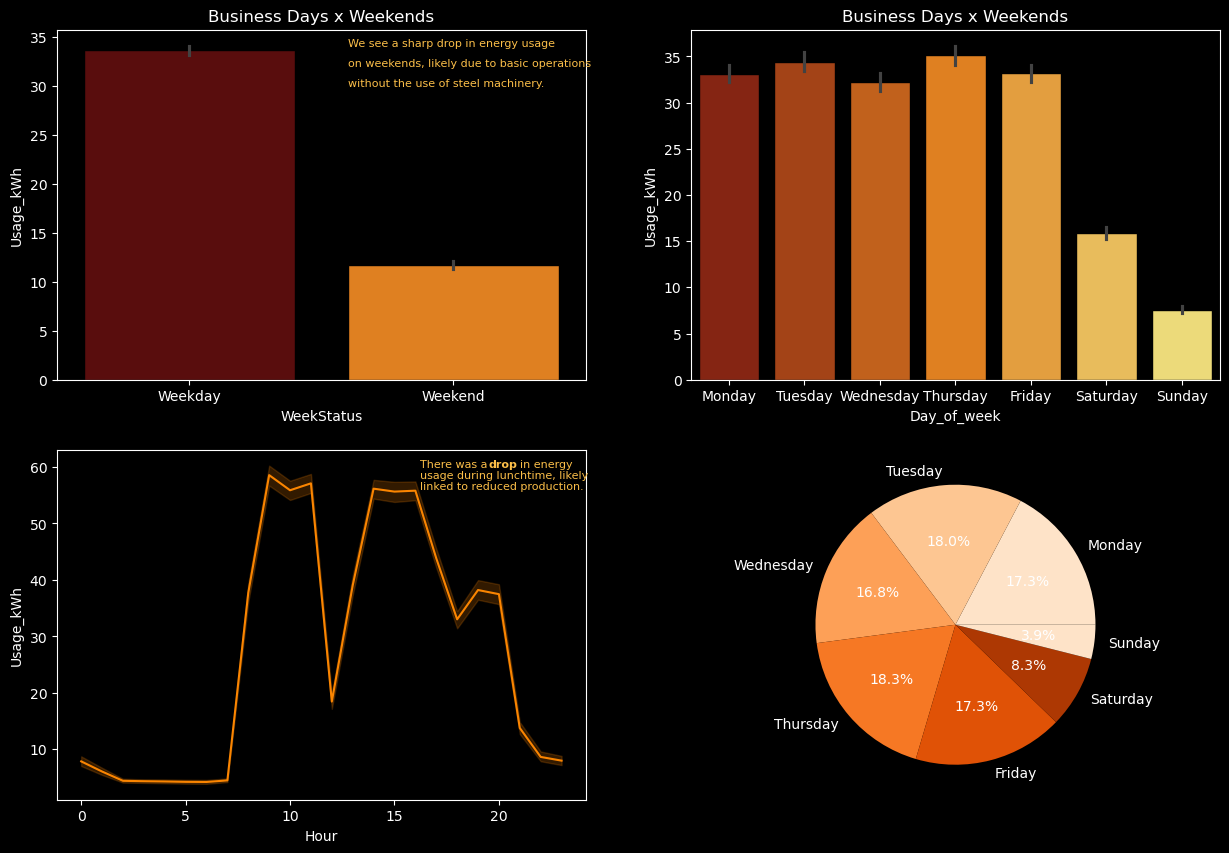

In [9]:
fwk = steeldf['Day_of_week'].unique()
color = plt.cm.afmhot(np.linspace(0.3,0.7,7))
color2= plt.cm.afmhot(np.linspace(0.2,0.5,2))
usg = steeldf.groupby('Day_of_week')['Usage_kWh'].mean()
usg = usg.reindex(fwk)
f, ax = plt.subplots(2,2,figsize=(15,10));
sns.barplot(ax=ax[0,0],data=steeldf,x='WeekStatus',y='Usage_kWh',edgecolor='black',palette=color2).set(title='Business Days x Weekends');
sns.barplot(ax=ax[0,1],data=steeldf,x='Day_of_week',y='Usage_kWh',edgecolor='black',palette=color).set(title='Business Days x Weekends');
sns.lineplot(ax=ax[1,0],data=steeldf,x='Hour',y='Usage_kWh',color='#fb8500')
ax[1,1].pie(labels=fwk,x=usg.values,autopct='%1.1f%%',colors=sns.color_palette('Oranges'));
ax[1,0].text(16.2,60,"There was a ",fontsize = 8,color='#fcbf49')
ax[1,0].text(19.5,60,"drop",fontsize = 8,color='#fcbf49',weight='bold')
ax[1,0].text(21,60,"in energy",fontsize = 8,color='#fcbf49')
ax[1,0].text(16.2,58,"usage during lunchtime, likely",fontsize = 8,color='#fcbf49')
ax[1,0].text(16.2,56,"linked to reduced production.",fontsize = 8,color='#fcbf49')
ax[0,0].text(0.6, 34, "We see a sharp drop in energy usage", fontsize=8, color='#fcbf49')
ax[0,0].text(0.6, 32, "on weekends, likely due to basic operations", fontsize=8, color='#fcbf49')
ax[0,0].text(0.6, 30, "without the use of steel machinery.", fontsize=8, color='#fcbf49')




## Energy Consumption Analysis

This set of charts provides a comprehensive view of electricity usage throughout the different seasons of the year. We identify seasonal patterns that impact consumption, revealing how energy is used over the hours of each season. The segmentation by periods of the day highlights peak demand times, while the monthly analysis helps us understand how seasonal variations influence energy consumption. With these insights, we can identify opportunities for optimization and operational adjustments throughout the year.


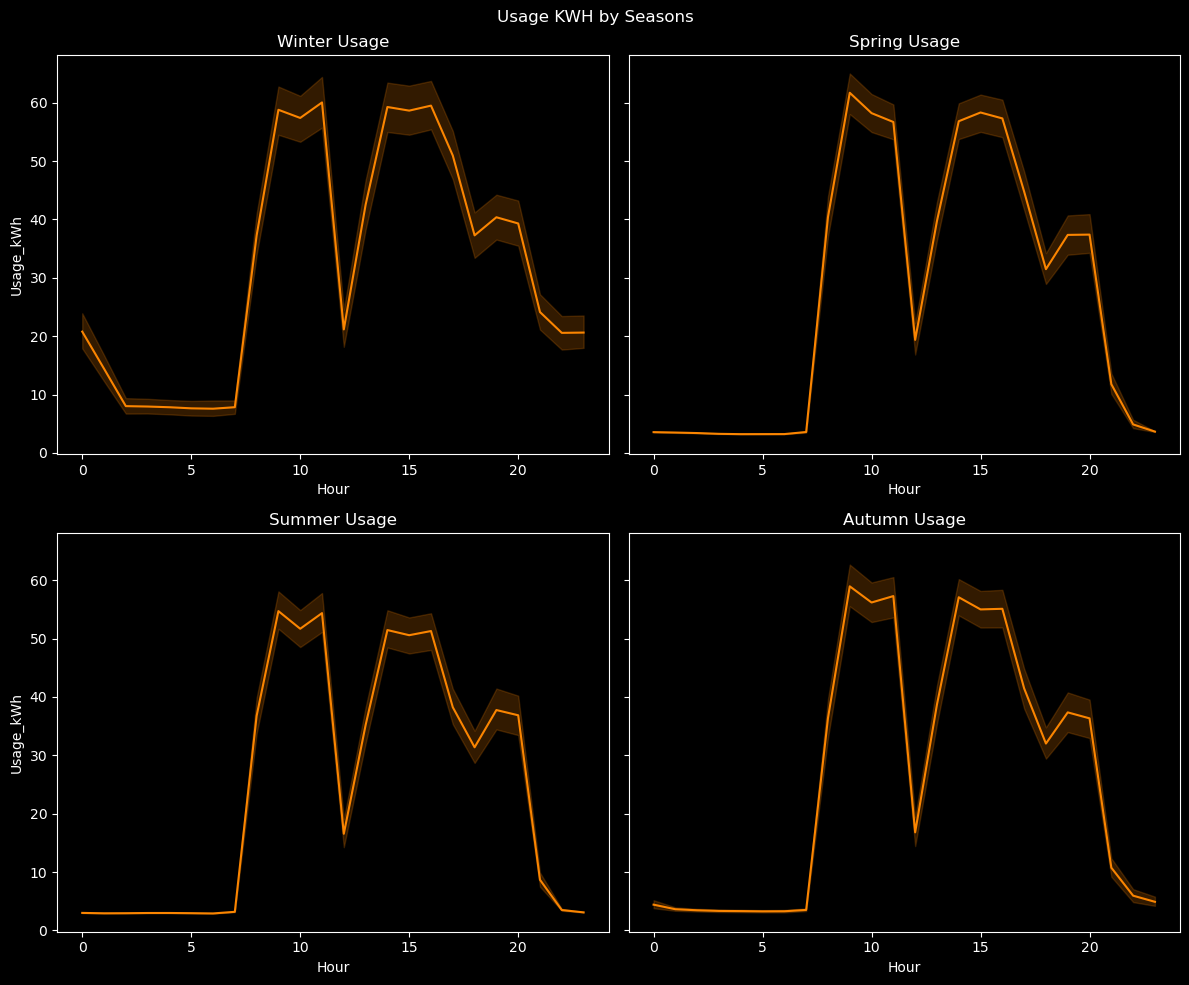

In [11]:
nmonths = ['Winter', 'Spring', 'Summer', 'Autumn']
f, ax = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
f.suptitle('Usage KWH by Seasons')
seasons_months = {
    'Winter': [1, 2, 12],  
    'Spring': [3, 4, 5],   
    'Summer': [6, 7, 8],  
    'Autumn': [9, 10, 11]   
}

for i, (season, months_in_season) in enumerate(seasons_months.items()):
    sns.lineplot(ax=ax[i//2, i%2], 
                 data=steeldf[steeldf["Month"].isin(months_in_season)],
                 x="Hour", 
                 y="Usage_kWh", 
                 color='#fb8500')
    ax[i//2, i%2].set_title(f'{season} Usage')

plt.tight_layout()
plt.show()

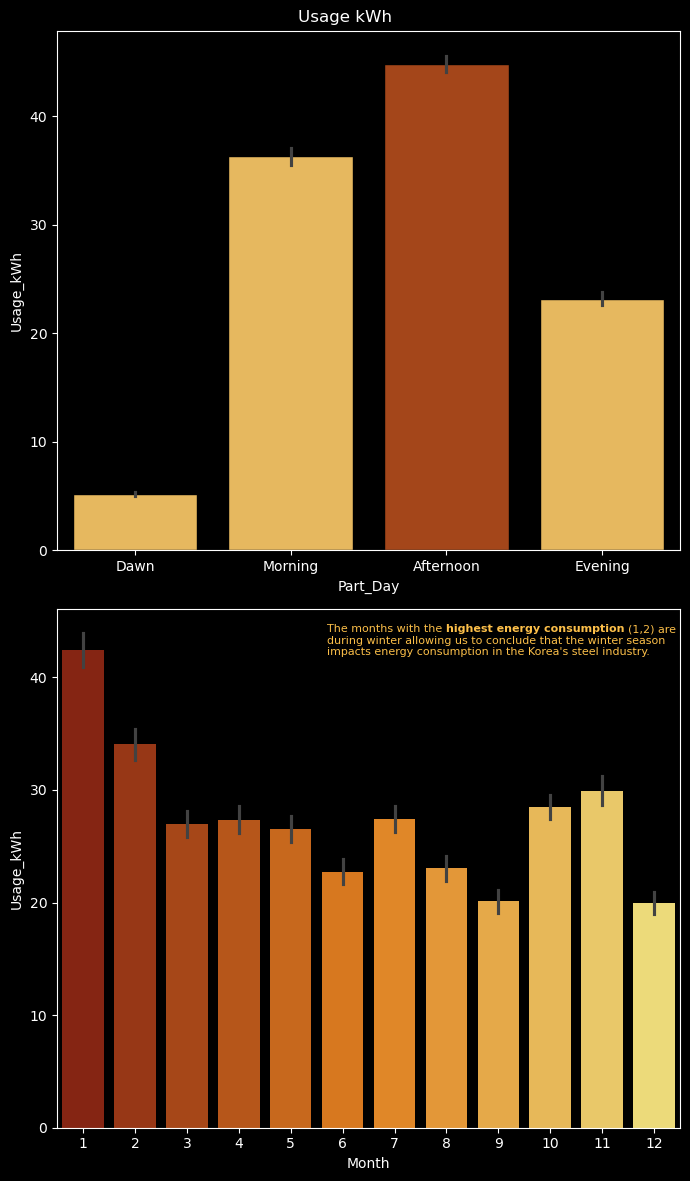

In [12]:
color4 = plt.cm.afmhot(np.linspace(0.3,0.7,12))
def Part_Day(segundos):
    if 0 <= segundos < 21600:
        return 'Dawn'
    elif 21600 <= segundos < 43200:
        return 'Morning'
    elif 43200 <= segundos < 64800:
        return 'Afternoon'
    else:
        return 'Evening' 
steeldf['Part_Day'] = steeldf['NSM'].apply(Part_Day)
f, ax = plt.subplots(2,1,figsize=(7,12))
sns.barplot(ax=ax[0],data=steeldf,x='Part_Day',y="Usage_kWh",edgecolor='black',palette=['#fcbf49','#fcbf49','#bb3e03','#fcbf49']);
sns.barplot(ax=ax[1],data=steeldf,y="Usage_kWh",x="Month",palette=color4);
f.suptitle("Usage kWh")
plt.tight_layout()
ax[1].text(4.7,44,"The months with the",fontsize = 8,color='#fcbf49');
ax[1].text(7.0,44,"highest energy consumption",fontsize = 8,color='#fcbf49',weight='bold');
ax[1].text(10.5,44,"(1,2) are",fontsize = 8,color='#fcbf49');
ax[1].text(4.7,43,"during winter allowing us to conclude that the winter season",fontsize = 8,color='#fcbf49');
ax[1].text(4.7,42,"impacts energy consumption in the Korea's steel industry.",fontsize = 8,color='#fcbf49');


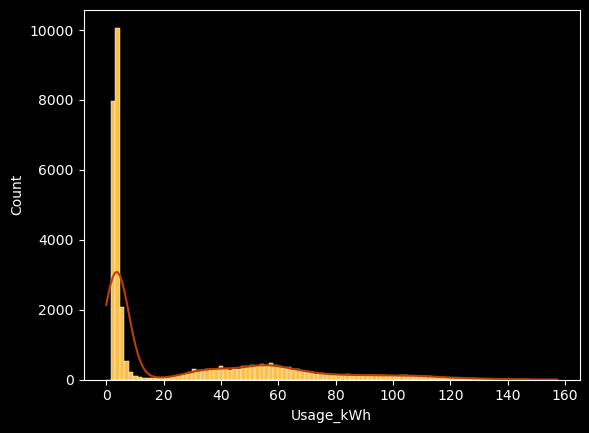

In [13]:
sns.histplot(data=steeldf,x="Usage_kWh",kde=True,bins=100,color='#bb3e03',facecolor='#fcbf49');


## Analysis of Electricity Usage by Load Type
This set of charts offers a comprehensive view of electricity usage in a steel industry, segmented by different load types: Light Load, Medium Load, and Maximum Load.

- Pie Chart: This chart displays the percentage distribution of load types throughout the year. The clear visualization of these percentages allows for a quick identification of the predominant load type, making it easier to understand how operations vary.

- Bar Chart (Weekdays vs Weekends): Here, we analyze how often each load type was used on weekends compared to weekdays. This comparison reveals operational patterns that may affect energy efficiency, helping to identify opportunities for optimization.

- Bar Chart (Energy Usage): This chart highlights the electricity consumption associated with each load type. By visualizing these data points, we can better understand how each load type contributes to total energy consumption, providing valuable insights for energy management and operational sustainability.








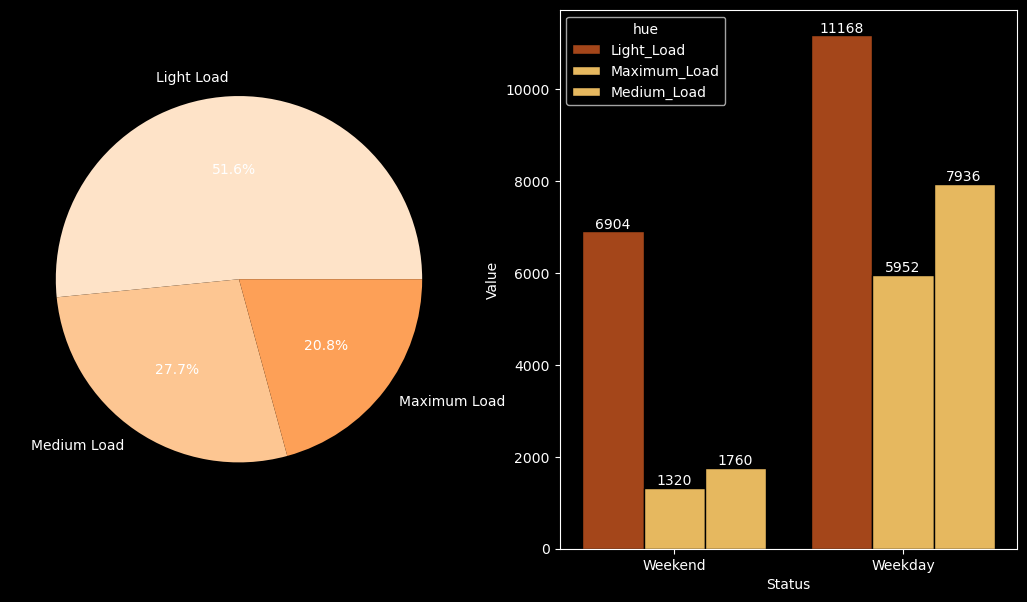

In [15]:
colors6 = ['#bb3e03','#fcbf49','#fcbf49','#bb3e03','#fcbf49','#fcbf49']
t = pd.DataFrame(steeldf.groupby(["WeekStatus","Load_Type"]).count()["Day"])
t = t.unstack()
weekday= t.values[0]
weekend= t.values[1]
listz = {"Value":[weekend[0],weekend[1],weekend[2],weekday[0],weekday[1],weekday[2]],"Status":["Weekend","Weekend","Weekend","Weekday","Weekday","Weekday"],"hue":["Light_Load","Maximum_Load","Medium_Load","Light_Load","Maximum_Load","Medium_Load"]}
loadcount = pd.DataFrame(listz)
lightld = (steeldf['Load_Type']=='Light_Load').sum()
mediumld = (steeldf['Load_Type']=='Medium_Load').sum()
maximumld = (steeldf["Load_Type"]=="Maximum_Load").sum()
f, ax = plt.subplots(1,2,figsize=(13,7));
sns.barplot(loadcount,x="Status",y="Value",hue="hue",palette=colors6,edgecolor='black');
for i in range(0,3):
    ax[1].bar_label(ax[1].containers[i])
ax[0].pie([lightld,mediumld,maximumld],labels=["Light Load","Medium Load","Maximum Load"],autopct='%1.1f%%',colors=sns.color_palette('Oranges'));


<Axes: xlabel='Load_Type', ylabel='Usage_kWh'>

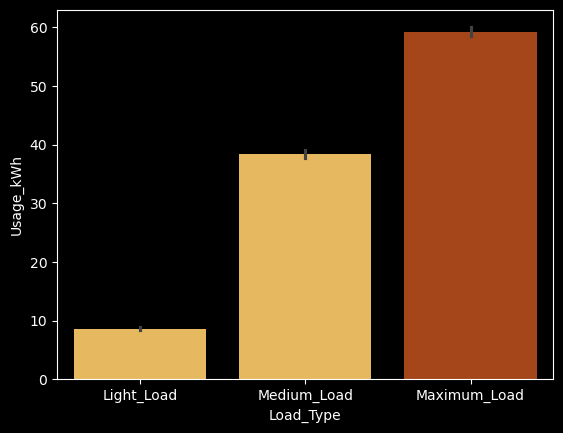

In [16]:
sns.barplot(data=steeldf,x='Load_Type',y='Usage_kWh',palette=['#fcbf49','#fcbf49','#bb3e03'])

## Analysis of Reactive Power and Load Factors in Relation to Energy Usage
This set of scatter plots illustrates the relationship between electricity usage and different metrics of reactive power in a steel industry, segmented by load type (Light Load, Medium Load, and Maximum Load).

- Lagging Reactive Power: The first chart shows how energy usage (kWh) relates to lagging reactive power. This visualization highlights how different load types impact the demand for reactive energy, providing insights into operational efficiency.

- Leading Reactive Power: In the second chart, we analyze leading reactive power in relation to energy usage. This comparison is crucial for understanding operational variations and the need to adjust energy generation to optimize performance.

- Lagging Power Factor: The third chart explores the lagging power factor concerning energy usage. This metric is vital for identifying energy utilization efficiency, helping the industry minimize losses and enhance performance.

- Leading Power Factor: Finally, the last chart analyzes the leading power factor in relation to energy usage. This analysis complements the overall view of how industry operations can be adjusted to improve energy efficiency.

<Axes: xlabel='Usage_kWh', ylabel='Leading_Current_Power_Factor'>

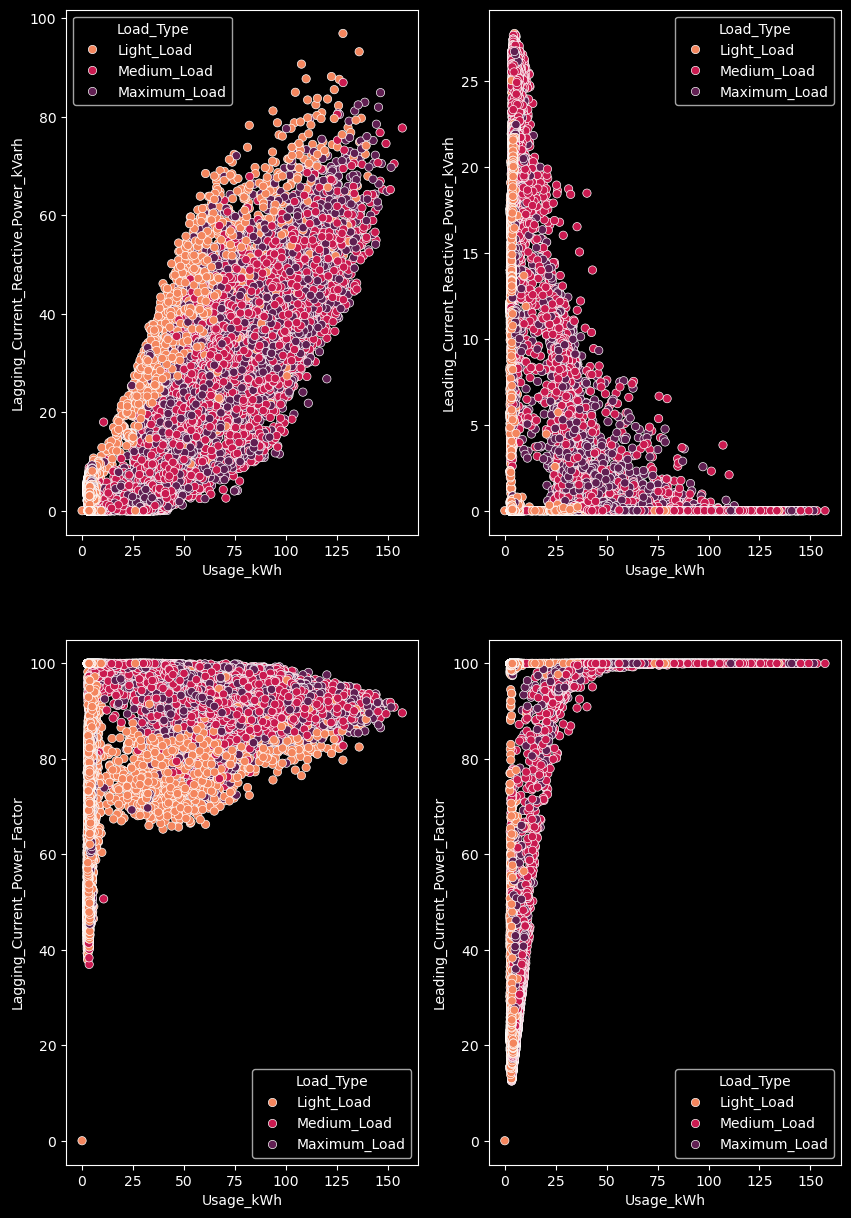

In [18]:
f, ax = plt.subplots(2,2,figsize=(10,15))
sns.scatterplot(ax=ax[0,0],data=steeldf,x='Usage_kWh',y='Lagging_Current_Reactive.Power_kVarh',hue='Load_Type',palette='rocket_r')
sns.scatterplot(ax=ax[0,1],data=steeldf,x='Usage_kWh',y='Leading_Current_Reactive_Power_kVarh',hue='Load_Type',palette='rocket_r')
sns.scatterplot(ax=ax[1,0],data=steeldf,x='Usage_kWh',y='Lagging_Current_Power_Factor',hue='Load_Type',palette='rocket_r')
sns.scatterplot(ax=ax[1,1],data=steeldf,x='Usage_kWh',y='Leading_Current_Power_Factor',hue='Load_Type',palette='rocket_r')


## Analysis of Reactive Power Distribution

This set of histograms presents the distribution of lagging and leading reactive power in a steel industry, providing a detailed view of the operational characteristics.

- Lagging Reactive Power Distribution: The first histogram illustrates the distribution of lagging reactive power. The overlaid density curve (KDE) helps visualize the frequency with which different levels of reactive power occur. This analysis is essential for understanding how operations impact energy efficiency and the quality of the energy used.

- Leading Reactive Power Distribution: The second histogram analyzes leading reactive power, offering a similar perspective. The comparison between the lagging and leading distributions can reveal discrepancies in operations and assist in identifying optimization opportunities in energy utilization.

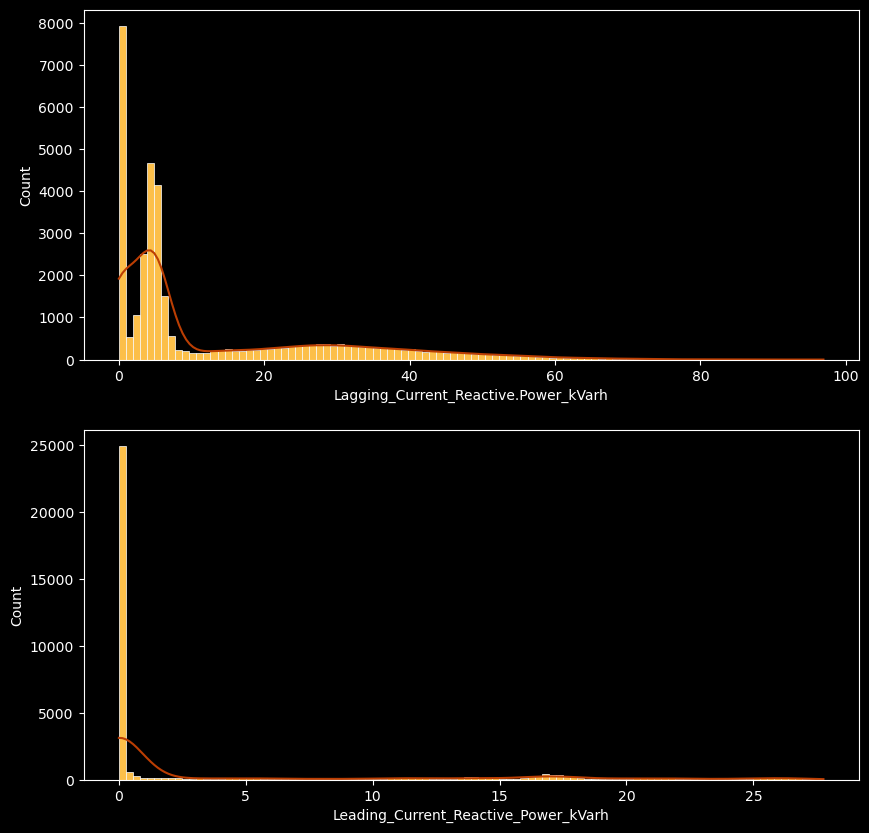

In [20]:
f, ax = plt.subplots(2,1,figsize=(10,10))
sns.histplot(ax=ax[0],data=steeldf,x="Lagging_Current_Reactive.Power_kVarh",kde=True,bins=100,color='#bb3e03',facecolor='#fcbf49');
sns.histplot(ax=ax[1],data=steeldf,x="Leading_Current_Reactive_Power_kVarh",kde=True,bins=100,color='#bb3e03',facecolor='#fcbf49');

## Analysis of CO2 Emissions: Relationships and Seasonal Variations

This set of graphs provides a comprehensive view of CO2 emissions in a steel industry, exploring both the relationship between energy usage and emissions as well as seasonal variations.

- Relationship Between Energy Usage and CO2 Emissions: The first graph presents a jointplot that shows the correlation between electricity consumption (kWh) and CO2 emissions. This visualization allows for the identification of patterns and trends, helping to understand how increased energy consumption can impact emissions, which is vital for formulating reduction strategies.

- Distribution of CO2 Emissions: The second graph utilizes a histogram to illustrate the distribution of CO2 emissions, with an overlaid density curve (KDE). This analysis provides a clear view of how emissions are distributed, allowing for the identification of any peaks or outliers that warrant investigation.

- CO2 Emissions by Season: The third set of graphs analyzes CO2 emissions throughout the seasons, highlighting hourly variations. The comparison between the seasons reveals how emissions behave during different periods, enabling the industry to adapt its operations and reduce emissions during critical times.

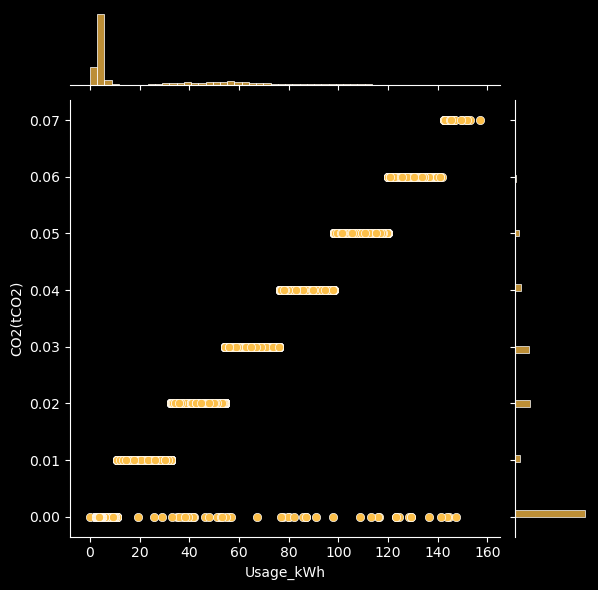

In [22]:
sns.jointplot(data=steeldf,x='Usage_kWh',y='CO2(tCO2)',color="#fcbf49")

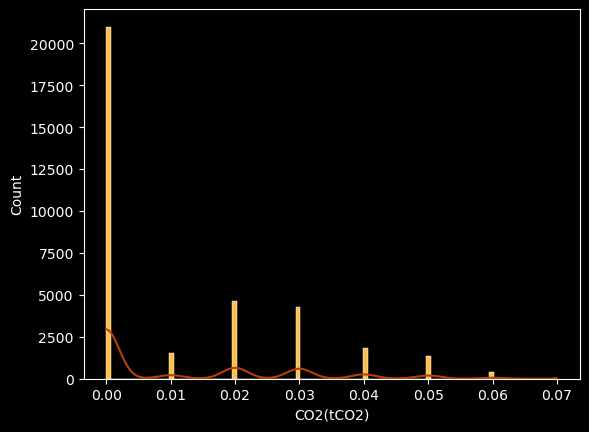

In [23]:
sns.histplot(data=steeldf,x="CO2(tCO2)",kde=True,bins=100,color='#bb3e03',facecolor='#fcbf49');

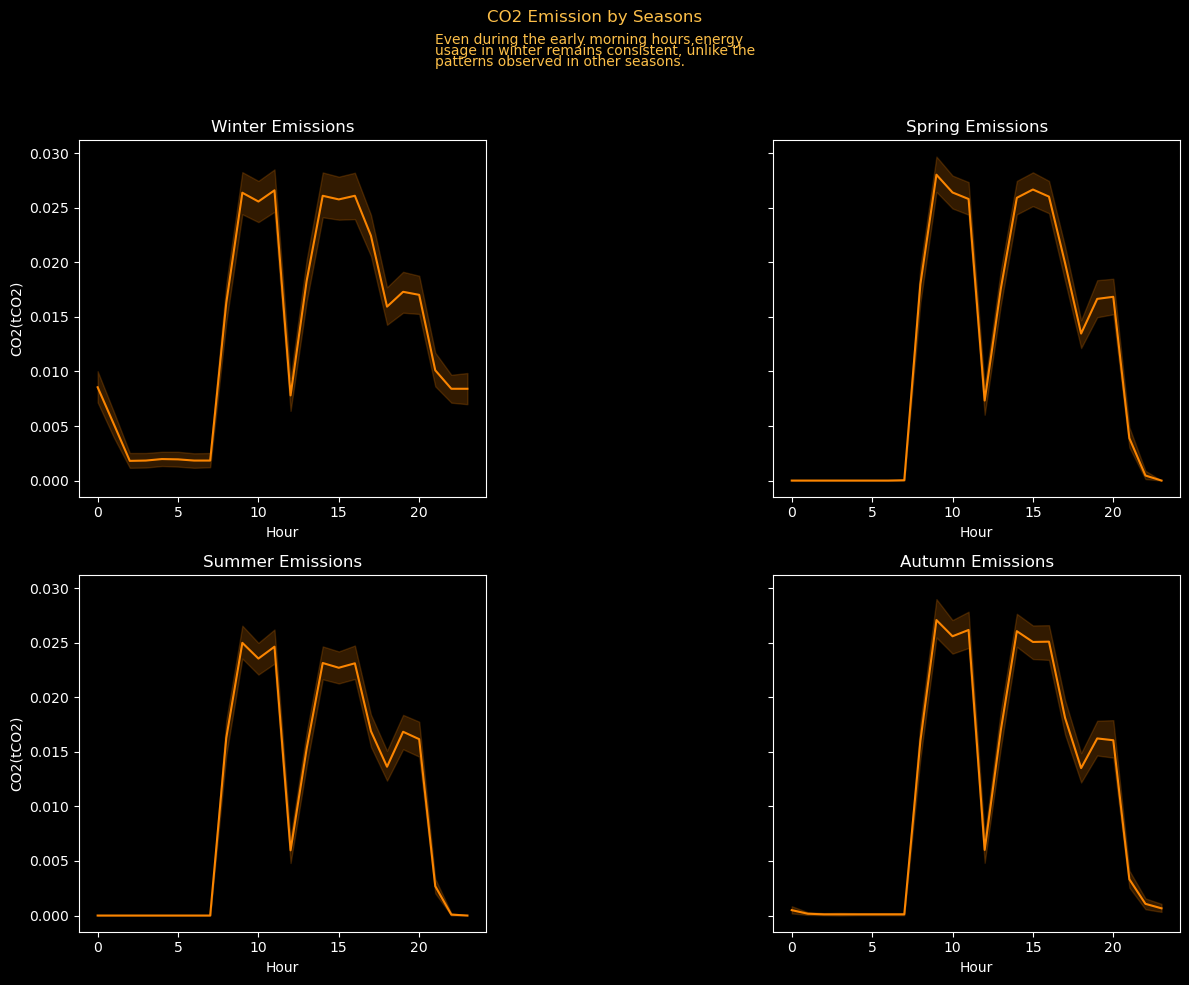

In [24]:
f, ax = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
f.suptitle('CO2 Emission by Seasons',color="#fcbf49")
for i, (season, months_in_season) in enumerate(seasons_months.items()):
    sns.lineplot(ax=ax[i//2, i%2], 
                 data=steeldf[steeldf["Month"].isin(months_in_season)],
                 x="Hour", 
                 y="CO2(tCO2)", 
                 color='#fb8500')
    ax[i//2, i%2].set_title(f'{season} Emissions')

ax[0,0].text(21,0.04,"Even during the early morning hours,energy",fontsize = 10,color="#fcbf49")
ax[0,0].text(21,0.039,"usage in winter remains consistent, unlike the",fontsize = 10,color="#fcbf49")
ax[0,0].text(21,0.038,"patterns observed in other seasons.",fontsize = 10,color="#fcbf49")
plt.tight_layout()
plt.show()